2


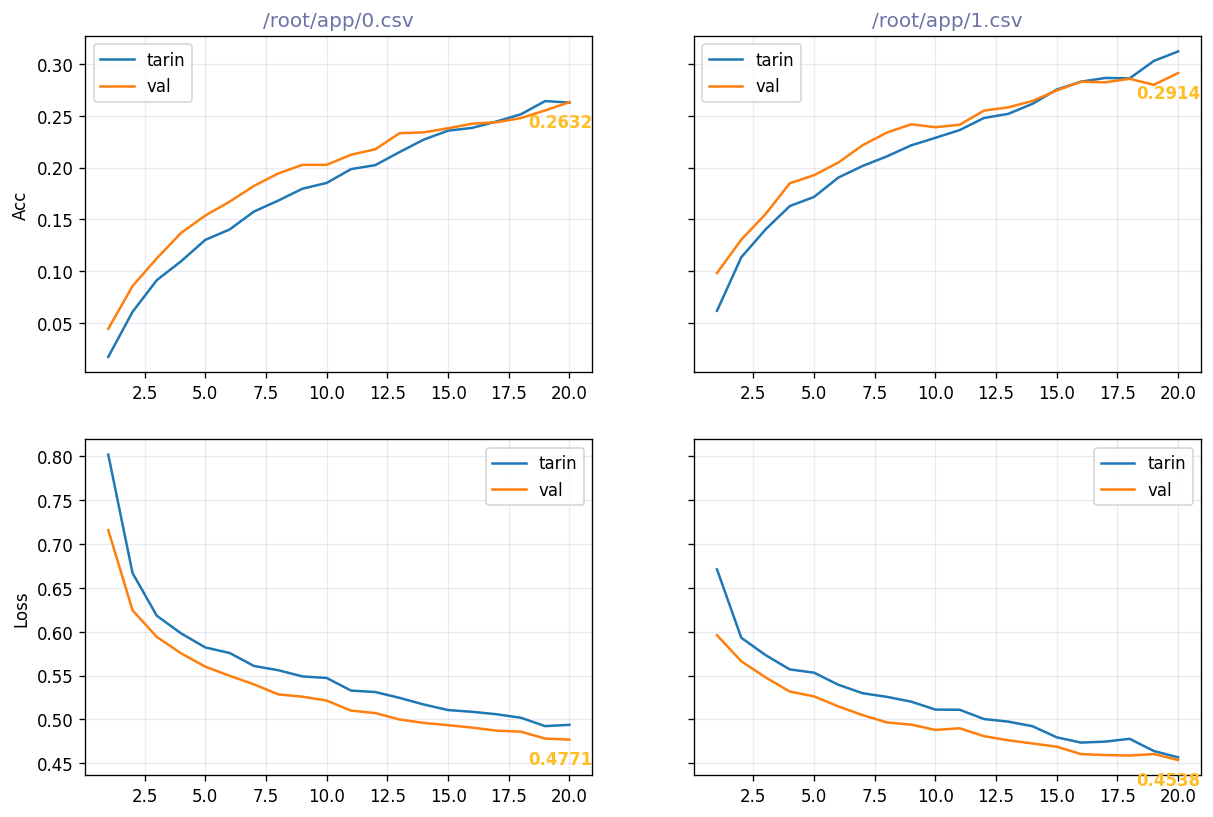

In [10]:
import os
import fnmatch

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

folder = "/root/app/"
pattern = "?.csv"
# pattern = "*hist*"

paths = []
for filename in os.listdir(folder): 
    if fnmatch.fnmatch(filename, pattern): paths.append(os.path.join(folder, filename))
paths = sorted(paths)
print(len(paths))

dfs = [pd.read_csv(path) for path in paths]

# figはウィンドウ、axesは1つのグラフ。axsにはaxesがいっぱい入ってるってイメージ
fig, axs = plt.subplots(2, len(dfs), dpi=120, figsize=(6*len(dfs), 8), sharey="row")
axs = axs.reshape(2, len(dfs))

for j, df in enumerate(dfs):
    ax = axs[0, j]
    x, y = df["epoch"], df["Acc"]
    # ax.set_xlabel(x.name)
    if j == 0: ax.set_ylabel(y.name)
    ax.plot(x, y, label="tarin")
    
    x, y = df["epoch"], df["vAcc"]
    ax.plot(x, y, label="val")
    ax.set_title(paths[j], fontdict={"color":"#2d3680", "alpha":0.7})
    last_x, last_y = x.iloc[-1], y.iloc[-1]
    ax.annotate(f"{last_y:.4f}", xy=(last_x, last_y), xytext=(-25, -15), textcoords="offset points", fontsize=10, color="#ffbe26", fontweight="bold")
    ax.legend()

    ax = axs[1, j]
    x, y = df["epoch"], np.log10(df["Loss"])
    # ax.set_xlabel(x.name)
    if j == 0: ax.set_ylabel(y.name)
    ax.plot(x, y, label="tarin")

    x, y = df["epoch"], np.log10(df["vLoss"])
    ax.plot(x, y, label="val")
    last_x, last_y = x.iloc[-1], y.iloc[-1]
    ax.annotate(f"{last_y:.4f}", xy=(last_x, last_y), xytext=(-25, -15), textcoords="offset points", fontsize=10, color="#ffbe26", fontweight="bold")
    ax.legend()
    
for ax_row in axs:
    for ax in ax_row:
        ax.grid(True, color="#2d3680", alpha=0.1)

plt.show()
